In [1]:
#导入数据集生成器
from sklearn.datasets import make_blobs
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#导入预处理工具
from sklearn.preprocessing import StandardScaler
#导入多层感知器神经网络
from sklearn.neural_network import MLPClassifier
#导入画图工具
import matplotlib.pyplot as plt
#生成样本数量为200，分类为2，标准差为5的数据集
X,y=make_blobs(n_samples=200,centers=2,cluster_std=5)
#将数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=38)
#对数据进行预处理
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#将与处理后的数据形态进行打印
print('训练集数据形态：',X_train_scaled.shape)
print('测试集数据形态：',X_test_scaled.shape)

训练集数据形态： (150, 2)
测试集数据形态： (50, 2)


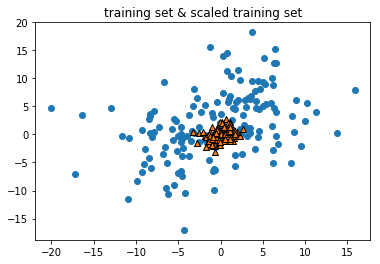

In [2]:
#原始训练集
plt.scatter(X_train[:,0],X_train[:,1])
#经过预处理的训练集
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],marker='^',edgecolor='k')
plt.title('training set & scaled training set')
plt.show()

In [3]:
#导入网格搜索
from sklearn.model_selection import GridSearchCV
#设定网格搜索的模型参数字典
params={'hidden_layer_sizes':[(50,),(100,),(100,100)],
       'alpha':[0.0001,0.001,0.01,0.1]}
#建立网格搜索模型
grid=GridSearchCV(MLPClassifier(max_iter=1600,random_state=38),param_grid=params,cv=3)
#拟合数据
grid.fit(X_train_scaled,y_train)
print('代码运行结果：')
print('模型最佳得分：{:.2f}'.format(grid.best_score_))
print('模型最佳参数：{}'.format(grid.best_params_))

代码运行结果：
模型最佳得分：0.87
模型最佳参数：{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}


In [4]:
print('测试集得分：{}'.format(grid.score(X_test_scaled,y_test)))

测试集得分：0.82


In [5]:
#导入管道模型
from sklearn.pipeline import Pipeline
#建立包含预处理和神经网络的管道模型
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('mlp',MLPClassifier(max_iter=1600,random_state=38))])
#用管道模型对训练集进行拟合
pipeline.fit(X_train,y_train)
#打印管道模型的分数
print('使用管道模型的MLP模型评分：{:.2f}'.format(
pipeline.score(X_test,y_test)))

使用管道模型的MLP模型评分：0.84


In [6]:
#使用管道模型进行网格搜索
#设置参数字典
params={'mlp__hidden_layer_sizes':[(50,),(100,),(100,100)],
       'mlp__alpha':[0.0001,0.001,0.01,0.1]}
#将管道模型加入网格搜索
grid=GridSearchCV(pipeline,param_grid=params,cv=3)
#对训练集进行拟合
grid.fit(X_train,y_train)
print('代码运行结果：')
print('交叉验证最高分：{:.2f}'.format(grid.best_score_))
print('模型最优参数：{}'.format(grid.best_params_))
print('测试集得分:{}'.format(grid.score(X_test,y_test)))

代码运行结果：
交叉验证最高分：0.87
模型最优参数：{'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100, 100)}
测试集得分:0.84


In [7]:
#打印模型中的步骤
print(pipeline.steps)

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1600, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=38, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]


#
#使用管道模型对股票涨幅进行回归分析

In [26]:
import pandas as pd
stocks=pd.read_csv('datasets.csv',encoding='gbk')
stocks=stocks.fillna(0)
#定义数据及中的特征X和y
X=stocks.loc[:,'现价':'流通股(亿)']
y=stocks['涨幅%']
#验证数据集形态
print(X.shape,y.shape)

(3681, 27) (3681,)


代码          0
名称          0
涨幅%         0
现价          0
涨跌          0
买价          0
卖价          0
总量          0
现量          0
涨速%         0
换手%         0
今开          0
最高          0
最低          0
昨收          0
市盈(动)       0
总金额         0
量比          0
振幅%         0
均价          0
内盘          0
外盘          0
内外比         0
买量          0
卖量          0
开盘金额        0
开盘换手Z       0
封成比         0
封单额         0
流通股(亿)      0
           ..
净利润(亿)      0
扣非净利润(亿)    0
未分利润(亿)     0
经营现金流(亿)    0
总现金流(亿)     0
股东人数        0
人均持股        0
人均市值        0
利润同比%       0
收入同比%       0
市净率         0
市现率         0
市销率         0
股息率%        0
每股收益        0
每股净资        0
调整后净资       0
每股公积        0
每股未分配       0
权益比%        0
净益率%        0
毛利率%        0
营业利润率%      0
净利润率%       0
研发费用(亿)     0
员工人数        0
交易代码        0
自选日         0
自选价         0
自选收益%       0
Length: 106, dtype: int64

In [27]:
#导入交叉验证
from sklearn.model_selection import cross_val_score
#导入MLP神经网络
from sklearn.neural_network import MLPRegressor
#使用交叉验证对MLP模型进行评分
scores=cross_val_score(MLPRegressor(random_state=38),X,y,cv=3)
#打印评分
print('模型平均分：{:.2f}'.format(scores.mean()))

模型平均分：-745938624460.06


In [28]:
#导入mkae_pipeline模块
from sklearn.pipeline import make_pipeline
#对比两种方法的语法
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('mlp',MLPRegressor(random_state=38))])
pipe=make_pipeline(StandardScaler(),MLPRegressor(random_state=38))
#打印两种建立管道模型方法的步骤
print(pipeline.steps)
print('\n',pipe.steps)

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=38, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]

 [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpregressor', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=38, shuffle=True, solver='a

In [30]:
#进行交叉验证
scores=cross_val_score(pipe,X,y,cv=3)
#打印交叉验证得分
print('模型平均分:{:.2f}'.format(scores.mean()))

模型平均分:-1.02


In [31]:
#导入特征选择模块
from sklearn.feature_selection import SelectFromModel
#导入随机森林模型
from sklearn.ensemble import RandomForestRegressor
#建立管道模型
pipe=make_pipeline(StandardScaler(),SelectFromModel(RandomForestRegressor(random_state=38)),
                  MLPRegressor(random_state=38))
#显示管道模型步骤
pipe.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('selectfrommodel',
  SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=38, verbose=0, warm_start=False),
          max_features=None, norm_order=1, prefit=False, threshold=None)),
 ('mlpregressor',
  MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
         beta_2=0.999, early_stopping=False, epsilon=1e-08,
         hidden_layer_sizes=(100,), learning_rate='constant',
         learning_rate_init=0.001, max_iter=200, momentum=0.9,
         n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
         random_state=38, shuffle=True, solver='

In [32]:
print('管道模型平均分:{:.2f}'.format(scores.mean()))

管道模型平均分:-1.02


In [34]:
#使用管道模型拟合数据
pipe.fit(X,y)
#查询哪些特征被选择
mask=pipe.named_steps['selectfrommodel'].get_support()
#打印特征选择的结果
print(mask)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[False  True False False False False  True False False False False False
 False False  True False False False False False  True False False False
  True  True False]


In [35]:
#定义参数字典
params=[{'reg':[MLPRegressor(random_state=38)],
        'scaler':[StandardScaler(),None]},
       {'reg':[RandomForestRegressor(random_state=38)],
       'scaler':[None]}]
#下面对pipeline进行实例化
pipe=Pipeline([('scaler',StandardScaler()),('reg',MLPRegressor())])
#对管道模型进行网格搜索
grid=GridSearchCV(pipe,params,cv=3)
#拟合数据
grid.fit(X,y)
#打印网格搜索结果
print('最佳模型是：\n{}'.format(grid.best_params_))
print('\n模型最佳得分是：{:.2f}'.format(grid.best_score_))

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


最佳模型是：
{'reg': MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=38, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False), 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

模型最佳得分是：-1.02
